<a href="https://colab.research.google.com/github/krislars/compuphys/blob/main/Pendulum_bifurcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math as math
from matplotlib import pyplot as plt

In [ ]:
q=0.5
g_over_L=1.
OmegaD=2./3.
dt=0.04
steps=100000

This next cell takes about 10 minutes to run:

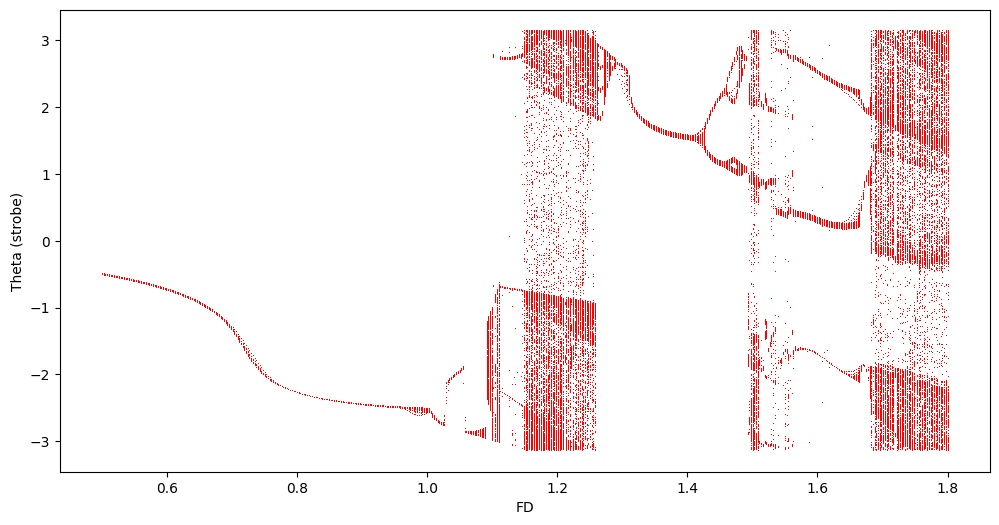

In [ ]:
fig,ax=plt.subplots(1,1,figsize=[12,6])
# Runge Kutta 2nd order, with clipping
theta = np.zeros(steps)
omega = np.zeros(steps)
t = np.zeros(steps)
theta[0] = 0.2 # radians
omega[0] = 0. # radians/second
for FD in np.linspace(0.5,1.8,num=500):
    for j in range(steps-1):
        theta_half = theta[j] + omega[j]*dt/2.
        omega_half = omega[j] + (-g_over_L*np.sin(theta[j]) - q*omega[j] + FD*np.sin(OmegaD*t[j]))*dt/2.
        t_half = t[j] + dt/2.
        theta[j+1] = theta[j] + omega_half*dt
        omega[j+1] = omega[j] + (-g_over_L*np.sin(theta_half) - q*omega_half + FD*np.sin(OmegaD*t_half))*dt
        t[j+1] = t[j] + dt
        if (theta[j+1] <= -math.pi):
            theta[j+1] = theta[j+1] + 2.*math.pi
        elif (theta[j+1] >= math.pi):
            theta[j+1] = theta[j+1] - 2.*math.pi
    inphase = np.remainder(t,2*math.pi/OmegaD) < dt
    plt.plot(FD*np.ones(np.sum(inphase))[5:],theta[inphase][5:],'r,')
plt.xlabel('FD')
plt.ylabel('Theta (strobe)')
plt.show()